# Part 1: N-Gram Implementations

In [1]:
from collections import Counter, defaultdict
from nltk import word_tokenize, ngrams

import re
import string
import random
import numpy as np

### 1.1 Preprocessing

1. Read the files
2. Remove special characters from the text
3. Tokenize the corpus
4. Build the vocabulary

In [2]:
with open('train.txt', 'r') as tr:
    train = tr.read()

with open('valid.txt', 'r') as test:
    test = test.read()
    
with open('input.txt', 'r') as sanity:
    sanity = sanity.read()
    
sanity

"but while the new york stock exchange did n't fall ___\nsome circuit breakers installed after the october N crash failed ___\nthe N stock specialist firms on the big board floor ___\nbig investment banks refused to step up to the plate ___\nheavy selling of standard & poor 's 500-stock index futures ___\nseven big board stocks ual amr bankamerica walt disney capital ___\nonce again the specialists were not able to handle the ___\n<unk> james <unk> chairman of specialists henderson brothers inc. it ___\nwhen the dollar is in a <unk> even central banks ___\nspeculators are calling for a degree of liquidity that is ___\nmany money managers and some traders had already left their ___\nthen in a <unk> plunge the dow jones industrials in ___\n<unk> trading accelerated to N million shares a record for ___\nat the end of the day N million shares were ___\nthe dow 's decline was second in point terms only ___\nin percentage terms however the dow 's dive was the ___\nshares of ual the parent of

In [3]:
def _tokenizer(text: str) -> str:
    """ Tokenizes the text but leaves the <unk> token """
    text = text.replace('<unk>', 'UNKNOWN')
    char_match = re.compile("[^a-zA-Z\s\']+")  
    text = re.sub(char_match, " ", text).replace("'", "")  ## Remove special characters and numbers
    
    tokenized = word_tokenize(text)
    for i, token in enumerate(tokenized):
        if token == 'UNKNOWN':
            tokenized[i] = '<unk>'
    return tokenized
    

def preprocess(text: str) -> tuple:
    """ Lowers, splits, removes special characters and numbers, and finally tokenizes the text """
    corpus = list()
    text = text.lower().split('\n')
    for s in text:
        corpus.append(_tokenizer(s))
    return corpus

In [4]:
train_corpus = preprocess(train)

In [5]:
train_corpus

[['aer',
  'banknote',
  'berlitz',
  'calloway',
  'centrust',
  'cluett',
  'fromstein',
  'gitano',
  'guterman',
  'hydro',
  'quebec',
  'ipo',
  'kia',
  'memotec',
  'mlx',
  'nahb',
  'punts',
  'rake',
  'regatta',
  'rubens',
  'sim',
  'snack',
  'food',
  'ssangyong',
  'swapo',
  'wachter'],
 ['pierre',
  '<unk>',
  'n',
  'years',
  'old',
  'will',
  'join',
  'the',
  'board',
  'as',
  'a',
  'nonexecutive',
  'director',
  'nov',
  'n'],
 ['mr',
  '<unk>',
  'is',
  'chairman',
  'of',
  '<unk>',
  'n',
  'v',
  'the',
  'dutch',
  'publishing',
  'group'],
 ['rudolph',
  '<unk>',
  'n',
  'years',
  'old',
  'and',
  'former',
  'chairman',
  'of',
  'consolidated',
  'gold',
  'fields',
  'plc',
  'was',
  'named',
  'a',
  'nonexecutive',
  'director',
  'of',
  'this',
  'british',
  'industrial',
  'conglomerate'],
 ['a',
  'form',
  'of',
  'asbestos',
  'once',
  'used',
  'to',
  'make',
  'kent',
  'cigarette',
  'filters',
  'has',
  'caused',
  'a',
  'high

In [6]:
test_corpus = preprocess(test)
test_corpus

[['consumers',
  'may',
  'want',
  'to',
  'move',
  'their',
  'telephones',
  'a',
  'little',
  'closer',
  'to',
  'the',
  'tv',
  'set'],
 ['<unk>',
  '<unk>',
  'watching',
  'abc',
  's',
  'monday',
  'night',
  'football',
  'can',
  'now',
  'vote',
  'during',
  '<unk>',
  'for',
  'the',
  'greatest',
  'play',
  'in',
  'n',
  'years',
  'from',
  'among',
  'four',
  'or',
  'five',
  '<unk>',
  '<unk>'],
 ['two',
  'weeks',
  'ago',
  'viewers',
  'of',
  'several',
  'nbc',
  '<unk>',
  'consumer',
  'segments',
  'started',
  'calling',
  'a',
  'n',
  'number',
  'for',
  'advice',
  'on',
  'various',
  '<unk>',
  'issues'],
 ['and',
  'the',
  'new',
  'syndicated',
  'reality',
  'show',
  'hard',
  'copy',
  'records',
  'viewers',
  'opinions',
  'for',
  'possible',
  'airing',
  'on',
  'the',
  'next',
  'day',
  's',
  'show'],
 ['interactive',
  'telephone',
  'technology',
  'has',
  'taken',
  'a',
  'new',
  'leap',
  'in',
  '<unk>',
  'and',
  'televi

In [7]:
sanity_corpus = preprocess(sanity)
sanity_corpus

[['but',
  'while',
  'the',
  'new',
  'york',
  'stock',
  'exchange',
  'did',
  'nt',
  'fall'],
 ['some',
  'circuit',
  'breakers',
  'installed',
  'after',
  'the',
  'october',
  'n',
  'crash',
  'failed'],
 ['the',
  'n',
  'stock',
  'specialist',
  'firms',
  'on',
  'the',
  'big',
  'board',
  'floor'],
 ['big',
  'investment',
  'banks',
  'refused',
  'to',
  'step',
  'up',
  'to',
  'the',
  'plate'],
 ['heavy',
  'selling',
  'of',
  'standard',
  'poor',
  's',
  'stock',
  'index',
  'futures'],
 ['seven',
  'big',
  'board',
  'stocks',
  'ual',
  'amr',
  'bankamerica',
  'walt',
  'disney',
  'capital'],
 ['once',
  'again',
  'the',
  'specialists',
  'were',
  'not',
  'able',
  'to',
  'handle',
  'the'],
 ['<unk>',
  'james',
  '<unk>',
  'chairman',
  'of',
  'specialists',
  'henderson',
  'brothers',
  'inc',
  'it'],
 ['when',
  'the',
  'dollar',
  'is',
  'in',
  'a',
  '<unk>',
  'even',
  'central',
  'banks'],
 ['speculators',
  'are',
  'calling',

In [8]:
def vocabulary(corpus: list) -> set:
    """ Sets the vocabulary based on the tokenized corpus """
    vocab = set()
    for s in corpus:
        vocab.update(s)
    vocab.update(["<s>", "</s>"])
    return list(vocab)

train_vocab = vocabulary(train_corpus)
test_vocab = vocabulary(test_corpus)
sanity_vocab = vocabulary(sanity_corpus)

### 1.2 Build Generic Bigram

1. Implements a generic bigram model 

    - It should also work for trigram, but it's relatively untested


2. Predicts the next words in the first line of the training set as a sanity check of predictions
3. Predicts the next 3 words of the `sanity_corpus` (which is `input.txt`)
    - The predictions are in the brackets
    - There are two predictions: one uses absolute prediction and the other uses a level of randomness. Absolute predictions only select the top predicted value. Randomness means that it one of the top 5 possible values.    
    
    
4. Calculates the perplexity of the test set, and the first 30 lines of the training set (as a sanity check)

In [9]:
class Ngram:
    
    def __init__(self,corpus: list,  vocabulary: list, n: int = 2):
        """ Initialized the class """
        self.n = n
        self.corpus = corpus
        self.vocabualry = vocabulary
        self._ngrams = self._get_ngrams()
        self.model = self._gen_model()
        
    def _get_ngrams(self):
        """ Gets the ngram count """
        ngram_count = defaultdict(lambda: defaultdict(lambda: 0))
        for tokens in self.corpus:
            ngram = ngrams(tokens, self.n, pad_left=True, pad_right=True, 
                           left_pad_symbol="<s>", right_pad_symbol="</s>")
            for gram in ngram:
                last = gram[-1]
                gram = tuple(gram[:-1])
                ngram_count[gram][last] += 1
                
        return ngram_count
    
    def _gen_model(self):
        """ Generates the ngram model """
        model = defaultdict(lambda: defaultdict(lambda: 0))
        for ngram, seq in self._ngrams.items():
            count = float(sum(seq.values()))
            for k, v in seq.items():
                prob = v / count
                model[ngram][k] = prob
        return model
    
    def _predict(self, gram: tuple, absolute: bool = True) -> str:
        """ Predicts the next word using the model """
        choices = self.model[gram]  # Checks if the word has been seen
        if not choices:  # If not seen, it is an unknown word
            tokens = tuple("<unk>" for i in range(self.n - 1))
            choices = self.model[tokens]
            indx = random.randint(0, len(choices))  # Pick any of the words that appear after unknown
        elif not absolute and len(choices) > 5:
            indx = random.randint(0, 4)  # Pick one of the top 5 words to add randomness
        else:
            indx = 0  # If seen, pick the word with highest probability
        
        vals = sorted(choices, key=choices.get, reverse=True)
        word = vals[indx]
        return word
    
    def _unk_probability(self) -> float:
        """ Gets the unknown probability """
        tokens = tuple("<unk>" for i in range(self.n - 1))
        return self.model[tokens]['<unk>']  # Gets the probability of an unkown sequence (e.g. (<unk>, <unk>))

    def next_word(self, tokens: list):
        """ Predicts the next word in a sentence using a sliding window """
        for s in tokens:
            predictions = list()
            ngram = ngrams(s, self.n - 1, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>")
            for gram in ngram:                    
                word = self._predict(gram)
                
                pred = [' '.join(gram), word]
                predictions.append(pred)
        
            self.report(predictions)
            
    def next_n_words(self, tokens: list, n: int = 3, absolute: bool = True) -> None:
        """ Predicts the last n words of a list of sentences """
        gram_size = self.n - 1
        for s in tokens:
            sent = list()
            sent.extend(s) # Copy the sentence so we don't modify it
            predictions = ["["]
            for i in range(n):
                ngram = tuple(sent[-gram_size:])
                word = self._predict(ngram, absolute)  # Predict the word
                sent.append(word) # Append the word to the sentence
                predictions.append(word)  
            
            predictions.append("]")
            print(f"{' '.join(s)} {' '.join(predictions)}")
        
    def perplexity(self, tokens: list):
        """ Given a list of tokens, evaluate the perplexity of the model 
        
            Uses the numerically stable implementation listed above
        """
        vocab = set()
        p = 0.
        for s in tokens:
            prob = 0.
            ngram = ngrams(s, self.n, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>")
            for i, gram in enumerate(ngram):
                vocab.add(gram)  # Add the ngram to our vocab
                last = gram[-1]
                gram = tuple(gram[:-1])
                pred = self.model[gram][last]  # Gets the probability of ngram
                if pred:
                    prob += np.log2(pred)
                else:
                    prob += np.log2(self._unk_probability())
                    
            if prob:
                p += prob
                
        p /= len(vocab)
        return pow(2, -p)
    
    def report(self, predictions: list) -> None:
        """ Reports the predictions to the user """
        for indx, pred in enumerate(predictions):
            tabs = ' ' * (indx)
            print(f"{tabs} {' '.join(pred)}")



In [10]:
bigram = Ngram(train_corpus, train_vocab)

In [11]:
bigram.next_word([train_corpus[0]])

 aer banknote
  banknote berlitz
   berlitz calloway
    calloway centrust
     centrust cluett
      cluett fromstein
       fromstein gitano
        gitano guterman
         guterman hydro
          hydro quebec
           quebec </s>
            ipo kia
             kia memotec
              memotec mlx
               mlx nahb
                nahb punts
                 punts rake
                  rake regatta
                   regatta rubens
                    rubens sim
                     sim snack
                      snack food
                       food and
                        ssangyong swapo
                         swapo wachter
                          wachter </s>


In [12]:
bigram.next_n_words(sanity_corpus[:30])

but while the new york stock exchange did nt fall [ </s> grounds </s> ]
some circuit breakers installed after the october n crash failed [ to n n ]
the n stock specialist firms on the big board floor [ traders said </s> ]
big investment banks refused to step up to the plate [ </s> avoided </s> ]
heavy selling of standard poor s stock index futures [ prices </s> ok ]
seven big board stocks ual amr bankamerica walt disney capital [ gains tax cut ]
once again the specialists were not able to handle the [ <unk> <unk> <unk> ]
<unk> james <unk> chairman of specialists henderson brothers inc it [ s <unk> <unk> ]
when the dollar is in a <unk> even central banks [ </s> covering the ]
speculators are calling for a degree of liquidity that is [ a <unk> <unk> ]
many money managers and some traders had already left their [ <unk> <unk> <unk> ]
then in a <unk> plunge the dow jones industrials in [ the <unk> <unk> ]
<unk> trading accelerated to n million shares a record for [ the <unk> <unk> ]
at the 

In [13]:
bigram.next_n_words(sanity_corpus[:30], absolute=False)

but while the new york stock exchange did nt fall [ and the new ]
some circuit breakers installed after the october n crash failed [ and n million ]
the n stock specialist firms on the big board floor [ traders </s> routine ]
big investment banks refused to step up to the plate [ a <unk> </s> ]
heavy selling of standard poor s stock index futures [ and <unk> and ]
seven big board stocks ual amr bankamerica walt disney capital [ gains on its ]
once again the specialists were not able to handle the [ new jersey turnpike ]
<unk> james <unk> chairman of specialists henderson brothers inc it [ has a new ]
when the dollar is in a <unk> even central banks [ </s> coordination between ]
speculators are calling for a degree of liquidity that is [ the company </s> ]
many money managers and some traders had already left their [ own account and ]
then in a <unk> plunge the dow jones industrials in [ n billion from ]
<unk> trading accelerated to n million shares a record for [ example of the ]
at th

In [14]:
bigram.perplexity(train_corpus[:30])

126.18039214037067

In [15]:
bigram.perplexity(test_corpus)

1493.01219167275

### 1.2 Build Good Turing

1. Implements a Good Turing bigram model 

    - It should also work for trigram, but it's relatively untested
    
    
2. Predicts the next words in the first line of the training set as a sanity check of predictions
3. Predicts the next 3 words of the `sanity_corpus` (which is `input.txt`)
    - The predictions are in the brackets
    - There are two predictions: one uses absolute prediction and the other uses a level of randomness. Absolute predictions only select the top predicted value. Randomness means that it one of the top 5 possible values.    
    
    
4. Calculates the perplexity of the test set, and the first 30 lines of the training set (as a sanity check)

In [16]:
class GoodTuring(Ngram):
    
    def __init__(self, corpus: list, vocabulary: list, n: int = 2):
        """ Initializes the class """
        super().__init__(corpus, vocabulary)
    
    def _gen_model(self):
        """ Generates the ngram model """
        frequency = self._count_ngrams()
        N = float(sum(frequency))  # Total number of ngrams
        freq_prob = self._smooth(Counter(frequency), N)  # Smoothes using Good Turing

        model = defaultdict(lambda: defaultdict(lambda: 0))
        for gram, choices in self._ngrams.items():
            N = float(sum(choices.values()))
            for k, v in choices.items():
                prob = freq_prob[v]
                model[gram][k] = prob / N
                
        tokens = tuple("<unk>" for i in range(self.n - 1))
        model[tokens]['<unk>'] = freq_prob[0]  # Sets the probability of an unkown ngram using Good Turing
        return model
    
    def _count_ngrams(self):
        """ Gets the frequency of each ngram """
        counts = list()
        for c in self._ngrams.values():
            counts.extend(list(c.values()))
        return counts
    
    def _smooth(self, freq_of_freq: dict, N: float) -> dict:
        """ Intakes the frequency of frequency and outputs the new probability p* """
        freq_prob = defaultdict(lambda: 0)
        freq_prob[0] = freq_of_freq[1] / N
        for k, v in freq_of_freq.items():
            k_star = k + 1
            if freq_of_freq[k_star]:
                c_star = (k_star * freq_of_freq[k_star]) / v  # Calculates c_star for every frequency
            else:
                c_star = 0
            freq_prob[k] = c_star
        return freq_prob


In [17]:
bigram = GoodTuring(train_corpus, train_vocab)

In [18]:
bigram.next_word([train_corpus[0]])

 aer banknote
  banknote berlitz
   berlitz calloway
    calloway centrust
     centrust cluett
      cluett fromstein
       fromstein gitano
        gitano guterman
         guterman hydro
          hydro quebec
           quebec </s>
            ipo kia
             kia memotec
              memotec mlx
               mlx nahb
                nahb punts
                 punts rake
                  rake regatta
                   regatta rubens
                    rubens sim
                     sim snack
                      snack food
                       food and
                        ssangyong swapo
                         swapo wachter
                          wachter </s>


In [19]:
bigram.next_n_words(sanity_corpus[:30])

but while the new york stock exchange did nt fall [ </s> cyclical stocks ]
some circuit breakers installed after the october n crash failed [ to have to ]
the n stock specialist firms on the big board floor [ traders said </s> ]
big investment banks refused to step up to the plate [ </s> conglomerate </s> ]
heavy selling of standard poor s stock index futures [ prices </s> disney ]
seven big board stocks ual amr bankamerica walt disney capital [ gains tax cut ]
once again the specialists were not able to handle the [ market </s> tanker ]
<unk> james <unk> chairman of specialists henderson brothers inc it [ was a unit ]
when the dollar is in a <unk> even central banks [ </s> turns out ]
speculators are calling for a degree of liquidity that is [ the market </s> ]
many money managers and some traders had already left their [ <unk> <unk> <unk> ]
then in a <unk> plunge the dow jones industrials in [ new <unk> <unk> ]
<unk> trading accelerated to n million shares a record for [ n <unk> <unk

In [20]:
bigram.next_n_words(sanity_corpus[:30], absolute=False)

but while the new york stock exchange did nt fall [ to make them ]
some circuit breakers installed after the october n crash failed [ labor </s> malcolm ]
the n stock specialist firms on the big board floor [ </s> pros is ]
big investment banks refused to step up to the plate [ a unit to ]
heavy selling of standard poor s stock index futures [ markets in their ]
seven big board stocks ual amr bankamerica walt disney capital [ corp and its ]
once again the specialists were not able to handle the [ market <unk> a ]
<unk> james <unk> chairman of specialists henderson brothers inc it [ would <unk> as ]
when the dollar is in a <unk> even central banks [ have the state ]
speculators are calling for a degree of liquidity that is [ <unk> as <unk> ]
many money managers and some traders had already left their [ own accounts that ]
then in a <unk> plunge the dow jones industrials in [ their money </s> ]
<unk> trading accelerated to n million shares a record for [ its own <unk> ]
at the end of the

In [21]:
bigram.perplexity(train_corpus[:30])

153.7655751576401

In [22]:
bigram.perplexity(test_corpus)

1190.1674455445132

### 1.2 Build Kneser Ney

1. Implements a Kneser Ney bigram model
2. Predicts the next words in the first line of the training set as a sanity check of predictions
3. Predicts the next 3 words of the `sanity_corpus` (which is `input.txt`)
    - The predictions are in the brackets
    - There are two predictions: one uses absolute prediction and the other uses a level of randomness. Absolute predictions only select the top predicted value. Randomness means that it one of the top 5 possible values.    
    
    
4. Calculates the perplexity of the test set, and the first 30 lines of the training set (as a sanity check)

In [23]:
class KneserNey(Ngram):
    
    """ Note that this implementation will only work for bigrams, hence it does not accept an argument 'n' """
    
    def __init__(self, corpus: list, vocabulary: list, d: float = 0.75):
        """ Initializes the class """
        self.d = d
        super().__init__(corpus, vocabulary)

    def _gen_model(self):
        """ Generates the trigram model """
        inverse_ngram = self._get_inverse_ngram()  # Inverse bigrams (allows computation of P_cont)
        ngram_count = self._count_ngrams()  # How many different bigrams there are
        
        model = defaultdict(lambda: defaultdict(lambda: 0))
        for ngram, seq in self._ngrams.items():
            count = float(sum(seq.values()))  # Unigram count
            discounted = len(seq.keys())  # Number of words that follow w_{i-1}
            
            for k, v in seq.items():
                # Number of words that precede w / total number of words preceding all words
                p_cont = len(inverse_ngram[k]) / ngram_count
                # Lambda = (d / c(w_{i-1}))  * (num words that follow w_{i-1})
                interpolation = (self.d / count) * discounted  
                prob = max((v - self.d), 0) / count
                prob += (interpolation * p_cont)
                model[ngram][k] = prob
                
        return model
    
    def _get_inverse_ngram(self) -> dict:
        """ Gets the number of unique words that follows each word (w2) in a bigram """
        inverse_count = defaultdict(lambda: set())
        for tokens in self.corpus:
            ngram = ngrams(tokens, self.n, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>")
            for w1, w2 in ngram:
                inverse_count[w2].add(w1)
        return inverse_count
    
    def _count_ngrams(self) -> float:
        """ Counts all the unique bigrams """
        counts = list()
        for c in self._ngrams.values():
            counts.extend(c.values())
        return float(len(counts))

In [24]:
bigram = KneserNey(train_corpus, train_vocab)

In [25]:
bigram.next_word([train_corpus[0]])

 aer banknote
  banknote berlitz
   berlitz calloway
    calloway centrust
     centrust cluett
      cluett fromstein
       fromstein gitano
        gitano guterman
         guterman hydro
          hydro quebec
           quebec </s>
            ipo kia
             kia memotec
              memotec mlx
               mlx nahb
                nahb punts
                 punts rake
                  rake regatta
                   regatta rubens
                    rubens sim
                     sim snack
                      snack food
                       food and
                        ssangyong swapo
                         swapo wachter
                          wachter </s>


In [26]:
bigram.next_n_words(sanity_corpus[:30])

but while the new york stock exchange did nt fall [ </s> transferred to ]
some circuit breakers installed after the october n crash failed [ to n n ]
the n stock specialist firms on the big board floor [ traders said </s> ]
big investment banks refused to step up to the plate [ </s> prolonged <unk> ]
heavy selling of standard poor s stock index futures [ prices </s> manufactures ]
seven big board stocks ual amr bankamerica walt disney capital [ gains tax cut ]
once again the specialists were not able to handle the [ <unk> <unk> <unk> ]
<unk> james <unk> chairman of specialists henderson brothers inc it [ s <unk> <unk> ]
when the dollar is in a <unk> even central banks [ </s> ratios </s> ]
speculators are calling for a degree of liquidity that is [ a <unk> <unk> ]
many money managers and some traders had already left their [ <unk> <unk> <unk> ]
then in a <unk> plunge the dow jones industrials in [ the <unk> <unk> ]
<unk> trading accelerated to n million shares a record for [ the <unk> <

In [27]:
bigram.next_n_words(sanity_corpus[:30], absolute=False)

but while the new york stock exchange did nt fall [ n to a ]
some circuit breakers installed after the october n crash failed [ coup attempt was ]
the n stock specialist firms on the big board floor [ </s> specialist in ]
big investment banks refused to step up to the plate [ and the n ]
heavy selling of standard poor s stock index futures [ contract </s> minor ]
seven big board stocks ual amr bankamerica walt disney capital [ of its own ]
once again the specialists were not able to handle the [ new hampshire and ]
<unk> james <unk> chairman of specialists henderson brothers inc it [ was <unk> of ]
when the dollar is in a <unk> even central banks [ and other major ]
speculators are calling for a degree of liquidity that is [ nt have a ]
many money managers and some traders had already left their [ money market and ]
then in a <unk> plunge the dow jones industrials in [ the company is ]
<unk> trading accelerated to n million shares a record for [ example of <unk> ]
at the end of the day

In [28]:
bigram.perplexity(train_corpus[:30])

183.50507483599276

In [29]:
bigram.perplexity(test_corpus)

1793.5796278753162

# Part 2: RNN

1. Builds the vocabulary in a dictionary form
2. Prepares the data by generating sequences of length 20 and encoding them with their index from the dictionary
3. Separates the data into training and validation data (80/20 split)
4. Builds a generator for the training and validation data to avoid memory errors during model training
5. Trains the RNN model
6. Shows some graphs to prove it isn't overfit or ran into any issues
7. Calculates perplexity and proves that it is $exp(\frac{total\_loss}{number\_of\_predictions})$
8. Predicts the next 3 words of the sanity corpus

### 2.1 Preprocessing

1. Builds the vocabulary in a dictionary form
2. Prepares the data by generating sequences of length 20 and encoding them with their index from the dictionary
3. Separates the data into training and validation data (80/20 split)

In [30]:
train_vocab = dict(zip(train_vocab, range(len(train_vocab))))
assert len(train_vocab.keys()) == len(train_vocab)

In [31]:
from keras.utils import to_categorical

def _get_sequences(corpus: list, vocab: dict, window_size: int = 20) -> tuple:
    x_train = list()
    y_train = list()
    
    start_pad = vocab['<s>']
    end_pad = vocab['</s>']
    sequences = [start_pad] * (window_size - 2)
    for s in corpus:
        sequences.append(start_pad)
        sequences.extend(vocab[word] for word in s)
        sequences.append(end_pad)

    for ngram in ngrams(sequences, window_size + 1):
        xi = np.array(ngram[:-1])
        yi = [ngram[-1]]
        x_train.append(xi)
        y_train.append(yi)
    return np.array(x_train), np.array(y_train)
        
def prepare(corpus: list, vocab: dict, window_size: int = 20) -> tuple:
    """ Prepares the training data """
    x_train, y_train = _get_sequences(corpus, vocab, window_size)
    samples = len(x_train)
    indices = list(range(samples))
    
    val = samples - int(samples * .2)
    x_train, y_train, x_val, y_val = x_train[:val], y_train[:val], x_train[val:], y_train[val:]
    assert (x_train.shape[0] + x_val.shape[0]) == samples
    assert (y_train.shape[0] + y_val.shape[0]) == samples
    return x_train, y_train, x_val, y_val

x_train, y_train, x_val, y_val = prepare(train_corpus, train_vocab)
x_train.shape

(776574, 20)

In [32]:
x_train[0:10], y_train[0:10]

(array([[3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,  536],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 3756, 3756,  536, 1033],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 3756,  536, 1033, 6901],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756,  536, 1033, 6901, 7562],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756,  536, 1033, 6901, 7562, 1863],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756,  536, 1033, 6901, 7562, 1863, 1845],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756,  536, 1033, 6901, 7562, 1863, 1845, 7510],
        [3756, 3756, 3756, 

### 2.2 Prepare the Generators

In [33]:
from keras.utils import to_categorical

def tr_generator(x_train, y_train, batch_size: int = 32, epochs: int = 10, num_classes: int = 1000) -> tuple:
    """ Generates batches of the x and y training data """
    iters = int(x_train.shape[0] / batch_size)
    
    for i in range(epochs):
        start = 0
        for i in range(iters):
            end = start + batch_size
            yield (x_train[start:end], to_categorical(y_train[start:end], num_classes=num_classes))
            start = end

b = 50
num_vocab = len(train_vocab.keys())
tr_gen = tr_generator(x_train, y_train, batch_size=b, num_classes=num_vocab)
epoch_steps = int(x_train.shape[0] / b)

In [34]:
def val_generator(x_val, y_val, batch_size: int = 32, epochs: int = 10, num_classes: int = 1000) -> tuple:
    """ Generates batches of the x and y training data """
    iters = int(x_train.shape[0] / batch_size)
    
    for i in range(epochs):
        start = 0
        for i in range(iters):
            end = start + batch_size
            yield (x_train[start:end, :], to_categorical(y_train[start:end], num_classes=num_classes))
            start = end

val_gen = val_generator(x_val, y_val, batch_size=b, num_classes=num_vocab)
val_steps = int(x_val.shape[0] / b)

### 2.3 Build the Model

In [35]:
from keras.layers import Embedding, GRU, Dense
from keras.models import Sequential
from keras import optimizers

In [36]:
model = Sequential()
model.add(Embedding(input_dim=len(train_vocab), output_dim=64))
model.add(GRU(256))
model.add(Dense(len(train_vocab), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          615296    
_________________________________________________________________
gru (GRU)                    (None, 256)               247296    
_________________________________________________________________
dense (Dense)                (None, 9614)              2470798   
Total params: 3,333,390
Trainable params: 3,333,390
Non-trainable params: 0
_________________________________________________________________


### 2.4 Compile and Train the Model

In [37]:
learning_rate = 1E-3

# Using categorical crossentropy loss since our target is a one-hot vector of the next word
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['categorical_accuracy'])

In [38]:
history = model.fit(tr_gen, steps_per_epoch=epoch_steps, epochs=10,
                    validation_data=val_gen, validation_steps=val_steps)

Epoch 1/10
15531/15531 [==============================] - 105s 7ms/step - loss: 5.7752 - categorical_accuracy: 0.1755 - val_loss: 5.0126 - val_categorical_accuracy: 0.2330
Epoch 2/10
15531/15531 [==============================] - 103s 7ms/step - loss: 4.7869 - categorical_accuracy: 0.2481 - val_loss: 4.5318 - val_categorical_accuracy: 0.2642
Epoch 3/10
15531/15531 [==============================] - 104s 7ms/step - loss: 4.4147 - categorical_accuracy: 0.2726 - val_loss: 4.0536 - val_categorical_accuracy: 0.2986
Epoch 4/10
15531/15531 [==============================] - 103s 7ms/step - loss: 4.1661 - categorical_accuracy: 0.2877 - val_loss: 3.4797 - val_categorical_accuracy: 0.3403
Epoch 5/10
15531/15531 [==============================] - 103s 7ms/step - loss: 3.9839 - categorical_accuracy: 0.2993 - val_loss: 4.1752 - val_categorical_accuracy: 0.2875
Epoch 6/10
15531/15531 [==============================] - 103s 7ms/step - loss: 3.8458 - categorical_accuracy: 0.3080 - val_loss: 4.0229 - v

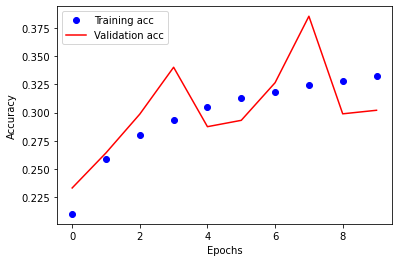

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

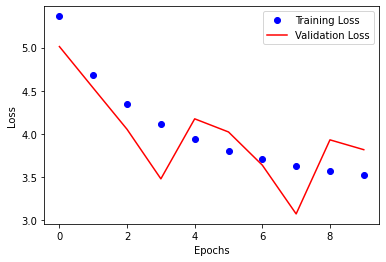

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 2.5 Prepare the Testing Data

In [41]:
x_test, y_test = _get_sequences(test_corpus, train_vocab)
x_test = np.array(x_test)
y_test = to_categorical(np.array(y_test), num_classes=len(train_vocab.keys()))

In [42]:
x_test.shape, x_test[0:5], y_test[0:5]

((76982, 20),
 array([[3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 1420],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 3756, 3756, 1420, 2321],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 3756, 1420, 2321, 8659],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 3756, 1420, 2321, 8659, 1174],
        [3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756, 3756,
         3756, 3756, 3756, 3756, 1420, 2321, 8659, 1174, 5049]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

### 2.6 Compute Perplexity

1. Compute the perplexity using the formula $exp(\frac{total\_loss}{number\_of\_predictions})$
2. Compute the perplexity using the numerically stable formula from before $2^{-\frac{1}{n} \sum_{i=1}^n log_2(p(s_i))}$

Notice that the perplexities are basically the same. This proves that the two formulas above are equal.

In [43]:
loss, _ = model.evaluate(x_test, y_test)

2406/2406 [==============================] - 8s 3ms/step - loss: 5.2751 - categorical_accuracy: 0.2445


In [44]:
perplexity = np.exp(loss)
perplexity

195.40484376832447

In [45]:
def perplexity(model, x_test, y_test):
    """ Calculates the models perplexity based on the given set """
    p = np.zeros(len(x_test))
    preds = model.predict(x_test)
    for i, xi in enumerate(preds):
        target = np.argmax(y_test[i])
        p[i] = preds[i][target]
    p = np.log2(p)
    p = np.sum(p) / len(x_test)
    return pow(2, -p)

perplexity(model, x_test, y_test)

195.40522951620574

### 2.7 Predict Next 3 Words

Note that the first set of predictions leaves the unknown token available for prediction while the second section does not leave the token in.

In [46]:
def _get_sequences(corpus: list, vocab: dict) -> tuple:
    x = list()
    
    for s in corpus:
        sent = ["<s>"]
        sent.extend(s)
        seq = np.array([vocab.get(word, vocab.get('<unk>')) for word in sent])
        x.append(seq)
        
    return x      
    
x_sanity = _get_sequences(sanity_corpus, train_vocab)
min(len(x) for x in x_sanity), max(len(x) for x in x_sanity), x_sanity[0:5]

(9,
 13,
 [array([3756, 4923, 2497, 4276, 5653, 3060, 3705, 2931, 4980, 4656, 8828]),
  array([3756, 3914,  753, 9069, 5457, 6774, 4276, 9043, 4666, 7213, 1371]),
  array([3756, 4276, 4666, 3705, 5002, 7833, 5283, 4276,   33, 3553, 6000]),
  array([3756,   33, 5041, 7837, 6452, 1174, 8700, 9080, 1174, 4276, 2819]),
  array([3756, 9588, 5501, 7711, 3225, 4763, 8735, 3705, 1644, 6291])])

In [47]:
def predict(model, sequences, vocab: dict, n: int = 3) -> None:
    """ Predicts the next 3 words in the test set """
    unk_indx = vocab['<unk>']
    predictions = None
    for i in range(n):
        predict = np.zeros((len(sequences), 1))
        for i, seq in enumerate(sequences):
            if predictions is not None:
                for j in predictions[i]:
                    seq = np.append(seq, j)
            
            pred = model.predict(seq)
            indx = np.argmax(pred, axis=1)[-1]
            predict[i][0] = indx
        
        if predictions is None:
            predictions = predict
        else:
            predictions = np.hstack((predictions, predict))
    
    return predictions


def report(sequences, predictions, vocab: dict):
    """ Reports the predicted values """
    inverse_vocab = dict(zip(vocab.values(), vocab.keys()))
    sents = list()
    for i, pred in enumerate(predictions):
        logits = list(sequences[i])
        logits.append('[')
        logits.extend(pred)
        logits.append(']')
        sents.append([inverse_vocab.get(indx, indx) for indx in logits])
    
    for s in sents:
        print(' '.join(s))

predictions = predict(model, x_sanity[0:30], train_vocab)
report(x_sanity[0:30], predictions, train_vocab)

<s> but while the new york stock exchange did nt fall [ </s> <s> <unk> ]
<s> some circuit breakers installed after the october n crash failed [ to <unk> <unk> ]
<s> the n stock specialist firms on the big board floor [ brokers who <unk> ]
<s> big investment banks refused to step up to the plate [ <unk> <unk> <unk> ]
<s> heavy selling of standard poor s stock index futures [ and <unk> <unk> ]
<s> seven big board stocks ual amr bankamerica walt disney capital [ gains in the ]
<s> once again the specialists were not able to handle the [ <unk> <unk> <unk> ]
<s> <unk> james <unk> chairman of specialists henderson brothers inc it [ is nt <unk> ]
<s> when the dollar is in a <unk> even central banks [ that <unk> <unk> ]
<s> speculators are calling for a degree of liquidity that is [ nt <unk> <unk> ]
<s> many money managers and some traders had already left their [ <unk> <unk> <unk> ]
<s> then in a <unk> plunge the dow jones industrials in [ the <unk> <unk> ]
<s> <unk> trading accelerated to n 

In [48]:
def predict(model, sequences, vocab: dict, n: int = 3) -> None:
    """ Predicts the next 3 words in the test set """
    unk_indx = vocab['<unk>']
    predictions = None
    for i in range(n):
        predict = np.zeros((len(sequences), 1))
        for i, seq in enumerate(sequences):
            if predictions is not None:
                for j in predictions[i]:
                    seq = np.append(seq, j)
            
            pred = model.predict(seq)[-1]
            pred[unk_indx] = -1  # Remove the prediction of the <unk> token so that we get real word predictions
            indx = np.argmax(pred)
            predict[i][0] = indx
        
        if predictions is None:
            predictions = predict
        else:
            predictions = np.hstack((predictions, predict))
    
    return predictions

predictions = predict(model, x_sanity[0:30], train_vocab)
report(x_sanity[0:30], predictions, train_vocab)

<s> but while the new york stock exchange did nt fall [ </s> <s> in ]
<s> some circuit breakers installed after the october n crash failed [ to be sold ]
<s> the n stock specialist firms on the big board floor [ brokers who had ]
<s> big investment banks refused to step up to the plate [ and the company ]
<s> heavy selling of standard poor s stock index futures [ and the company ]
<s> seven big board stocks ual amr bankamerica walt disney capital [ gains in the ]
<s> once again the specialists were not able to handle the [ company s p ]
<s> <unk> james <unk> chairman of specialists henderson brothers inc it [ is nt immediately ]
<s> when the dollar is in a <unk> even central banks [ that the company ]
<s> speculators are calling for a degree of liquidity that is [ nt immediately though ]
<s> many money managers and some traders had already left their [ own a n ]
<s> then in a <unk> plunge the dow jones industrials in [ the company s ]
<s> <unk> trading accelerated to n million shares a